# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

> This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The reason why the patients did not show up attract our attention.

> In this project, we attempt to answer the question of how likely a patient would show up to their appointment as scheduled, and how do the variables factor in that outcome. 

#### Questions
> 1) Does the age of patients affect the likelihood of no-show appointments? <br> 
> 2) Does the no show history of patients affect future showups? <br> 
> 3) How can we predict noshow appointments given patient's information?<br> 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Load in the data, check for cleanliness, and then trim and clean your dataset for analysis.
### General Properties

In [34]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [37]:
#Check values in SMS_Received column
print(df['SMS_received'].unique())

[0 1]


In [38]:
#Check values in Handicapped column
print(df['Handcap'].unique())

[0 1 2 3 4]


In [39]:
df.info()
#This shows there is no NaN in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [40]:
df.describe()
#This shows negative age

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


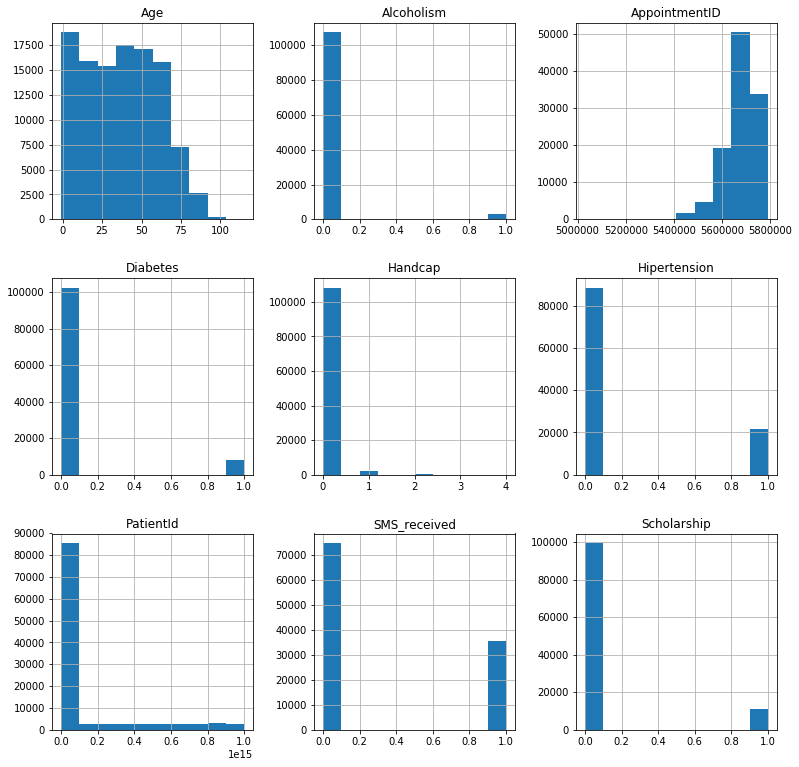

In [41]:
df.hist(figsize=(13,13));

In [42]:
#Check na
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [43]:
#check duplicates
sum(df.duplicated())

0

In [44]:
df[df['Age']<=0]
#Check for unreasonable age numbers

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


##### Changes to be made to the dataset:
> Correct spelling of 'Hipertension', 'Handcap', 'No-show' columns. <br> 
> Change ScheduledDay and AppointmentDay to pandas datetime format. <br> 
> Drop AppointmentID column as it is not needed for analysis. <br> 
> Change PatientId column to integer type <br> 
> Create a column to indicate what day of the week the appointment falls on <br> 
> Replace 'yes', 'no' values in the No_show column to 0, 1 <br> 
> Filter out unreasonable age numbers <br> 
> Create a column of number of missed appointments per PatientId
### Data Cleaning

In [45]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Fixed typos in column names
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicapped', 'No-show': 'No_show'}, inplace = True)

In [46]:
#Change PatientId from float to int
df['PatientId'] = df['PatientId'].astype('int64')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
# Drop AppointmentID column
df.drop(columns=['AppointmentID'])

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [48]:
#Convert AppointmentDay and ScheduledDay from string to datetime64
df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)

In [49]:
#add a 'Day of week' column
df['Day_of_week'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())

In [50]:
#Replace "Yes","No" in No_show with 0 and 1
df['No_show'] = df.No_show.replace(to_replace=['No', 'Yes'], value=[0, 1])
#df['No_show'].replace({'No':0,'Yes':1},inplace=True)

In [51]:
#Verify values in No_show
df.No_show.unique()

array([0, 1])

In [52]:
#list distinct values of Age
print(sorted(df.Age.unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [53]:
#Filter out unreasonable age
df = df[df['Age'] > 0]

In [54]:
#verify - list distinct values of Age
print(sorted(df.Age.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [55]:
#Calculate number of appointments missed
df['MissedAppointments'] = df.groupby(by=['PatientId'])['No_show'].cumsum()

<a id='eda'></a>
## Exploratory Data Analysis

> This section includes tatistics and create visualizations with the goal of addressing the research questions posed in the Introduction section.

### Research 1: Overall analysis of appointments that are kept

In [56]:
# create a new column of true false values for show-noshow status
showed = df['No_show'] == 0
noshowed = df['No_show'] == 1
df['showed'] = showed

True     85307
False    21680
Name: showed, dtype: int64


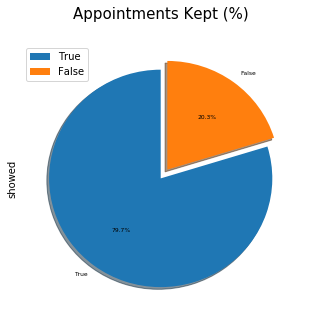

In [57]:
status = df['showed'].value_counts()
print(status)
explode = (0, 0.1)
pieChart = status.plot.pie(figsize=(5,5), autopct='%1.1f%%', fontsize = 6, shadow = True, startangle=90, explode = explode);
pieChart.set_title("Appointments Kept" + ' (%)\n', fontsize = 15);
plt.legend()

<a id='eda'></a>

### Research 2: Effects of a few notable factors on probability of people showing up to their appointment

In [58]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def probability_show(data, group_by):
    df = pd.crosstab(index = data[group_by], columns = data['No_show']).reset_index()
    #calculate probability of showing up as 'O' (no missed) and '1' (missed)
    df['probshow'] = df[0]/(df[1]+df[0])
    return df[[group_by, 'probshow']]

In [59]:
import seaborn as sns

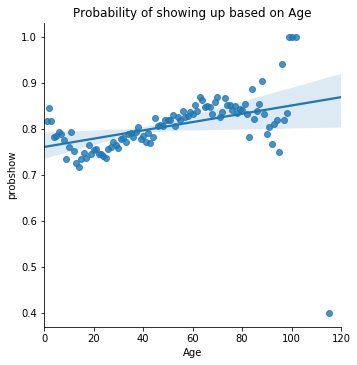

In [60]:
sns.lmplot(data = probability_show(df, 'Age'), x = 'Age', y = 'probshow', fit_reg = True)
plt.xlim(0, 120)
plt.title('Probability of showing up based on Age')
plt.show()

> **Conclusion**: The probability of patients showing up to their appointments is positively correlated with their age. 

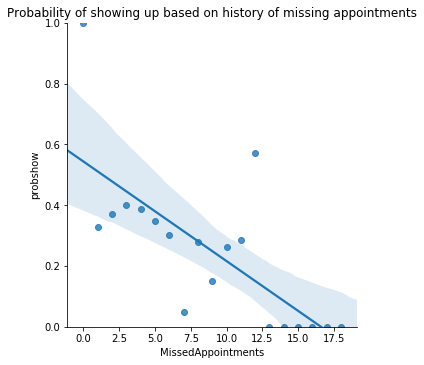

In [61]:
sns.lmplot(data = probability_show(df, 'MissedAppointments'), x = 'MissedAppointments', y = 'probshow', fit_reg = True)
plt.title('Probability of showing up based on history of missing appointments')
plt.ylim(0, 1)
plt.show()

> **Conclusion**: A history of appointment no-show is a good indicator of future appointments kept

SMS_received
0    0.832712
1    0.723348
Name: showed, dtype: float64


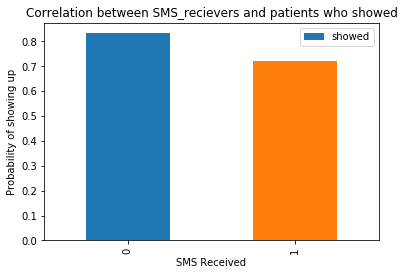

In [62]:
print(df.groupby('SMS_received').showed.mean())
df.groupby('SMS_received').showed.mean().plot(kind='bar');
plt.xlabel("SMS Received")
plt.ylabel("Probability of showing up")
plt.title("Correlation between SMS_recievers and patients who showed")
plt.legend()

> **Conclusion**: The data shows that no showers are likely to have been received an SMS.

In [76]:
#Determine the mean of times showing up for these categories:
disease_of_df = ['Gender','Hypertension','Alcoholism','Diabetes']
for r in columns_of_df :
    print(df.groupby(r).showed.mean())

Gender
F    0.796415
M    0.799154
Name: showed, dtype: float64
Hypertension
0    0.789778
1    0.826980
Name: showed, dtype: float64
Alcoholism
0    0.797321
1    0.798512
Name: showed, dtype: float64
Diabetes
0    0.795545
1    0.819967
Name: showed, dtype: float64


> **Conclusion**: Further investigation needed for Hypertension and Diabetes

Diabetes
0    0.795545
1    0.819967
Name: showed, dtype: float64


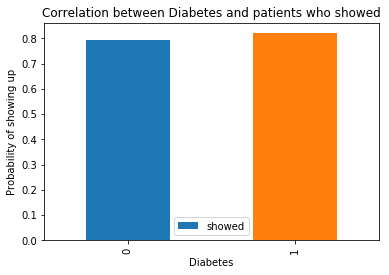

In [77]:
print(df.groupby('Diabetes').showed.mean())
df.groupby('Diabetes').showed.mean().plot(kind='bar');
plt.xlabel("Diabetes")
plt.ylabel("Probability of showing up")
plt.title("Correlation between Diabetes and patients who showed")
plt.legend()

> **Conclusion**: Although patients with diabetes are more likely to show up, there is not a strong difference to determine reliability of this variable

Hypertension
0    0.789778
1    0.826980
Name: showed, dtype: float64


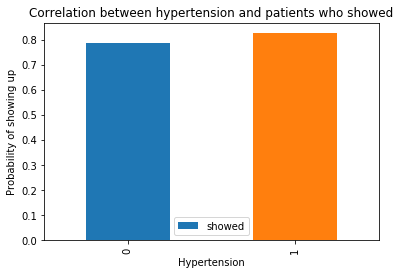

In [78]:
print(df.groupby('Hypertension').showed.mean())
df.groupby('Hypertension').showed.mean().plot(kind='bar');
plt.xlabel("Hypertension")
plt.ylabel("Probability of showing up")
plt.title("Correlation between hypertension and patients who showed")
plt.legend()

> **Conclusion**: Patients with hypertension are more likely to show up

In [87]:
# create a new column of true false values for handicapped status
yeshandicapped = df['Handicapped'] > 0
df['yeshandicapped'] = yeshandicapped

yeshandicapped
False    0.796911
True     0.818304
Name: showed, dtype: float64


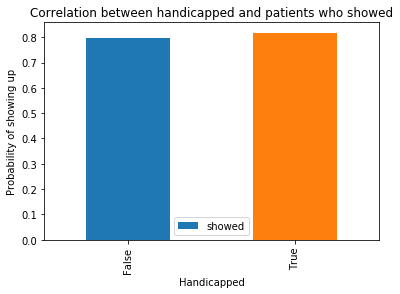

In [86]:
print(df.groupby('yeshandicapped').showed.mean())
df.groupby('yeshandicapped').showed.mean().plot(kind='bar');
plt.xlabel("Handicapped")
plt.ylabel("Probability of showing up")
plt.title("Correlation between handicapped and patients who showed")
plt.legend()

> **Conclusion**: Handicap patients are more likely to show up

Day_of_week
1    0.793864
2    0.797672
3    0.802790
4    0.805270
5    0.786623
6    0.769231
Name: showed, dtype: float64


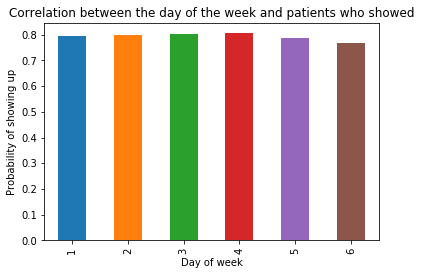

In [52]:
print(df.groupby('Day_of_week').showed.mean())
df.groupby('Day_of_week').showed.mean().plot(kind='bar');
plt.xlabel("Day of week")
plt.ylabel("Probability of showing up")
plt.title("Correlation between the day of the week and patients who showed")
plt.show()

> **Conclusion**: Probability that patients show up falls if appointment is on a weekend

In [ ]:
print(df.groupby('Day_of_week').showed.mean())
df.groupby('Day_of_week').showed.mean().plot(kind='bar');
plt.xlabel("Day of week")
plt.ylabel("Probability of showing up")
plt.title("Correlation between the day of the week and patients who showed")
plt.show()

## Conclusions:
### Results:
> Our dataset suggests that:<br> 
> 1) The factors that affect the probability of a patient showing up to their appointment are age, day of week, and pattern of missing appointments. <br> 
> 2) Older people tend to show up more often<br> 
> 3) Patients are more likely to make it to their weekend appointments<br> 
> 4) If patients have missed appointments in the past, it's likely that they will not show up<br>
> 5) Handicap patients are more likely to show up<br>
> 6) Hypertension patients are more likely to show up
### Limitations:
> 1) Most of the variables are categorical, which does not show a high level of statistical method that can be used to provide correlations etc <br> 
> 2) The statistics used are descriptive statistics, not inferential, which means that we did not create any hypotheses or controlled experiments or inferences with our data. <br> 
> 3) We do not have a lot of details for certain factors to draw conclusions. <br>
> 4) Since most of our data is categorical, cannot show strong correlations between factors

## Submitting your Project 
> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])